<a href="https://colab.research.google.com/github/ViniitMe/Machine-Learning-foundation-and-Applications/blob/master/KMeans_15MI33017.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy
from google.colab import drive
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from sklearn.preprocessing import LabelEncoder, StandardScaler, normalize
from sklearn.model_selection import train_test_split

In [0]:
|drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
#Dataset Loading
data = pd.read_csv("/content/drive/My Drive/15MI33017/DataSetk-means.csv")

Data Exploration

In [0]:
print(data.head())
print("\n")
print(data.columns)
print("\n")
print("data shape: " +str(data.shape))
print("\n")
print(data.info())

     temp  rain_1h  snow_1h  ...  weather_description traffic_volume  weather_main
0  288.28        0        0  ...     scattered clouds           5545        Clouds
1  289.36        0        0  ...        broken clouds           4516        Clouds
2  289.58        0        0  ...      overcast clouds           4767        Clouds
3  290.13        0        0  ...      overcast clouds           5026        Clouds
4  291.14        0        0  ...        broken clouds           4918        Clouds

[5 rows x 7 columns]


Index(['temp', 'rain_1h', 'snow_1h', 'clouds_all', 'weather_description',
       'traffic_volume', 'weather_main'],
      dtype='object')


data shape: (499, 7)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 7 columns):
temp                   499 non-null float64
rain_1h                499 non-null int64
snow_1h                499 non-null int64
clouds_all             499 non-null int64
weather_description    499 non-null objec

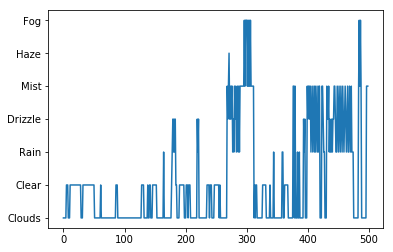

In [0]:
plt.plot(data['weather_main'])

Data Preprocessing

In [0]:
# Converting categorical variable to numerical
print(data['weather_description'].value_counts())
print("\n")
print(data['weather_main'].value_counts())
print("\n")
print(np.unique(data['rain_1h']))
print("\n")
print(np.unique(data['snow_1h']))

overcast clouds            110
sky is clear               107
broken clouds               66
mist                        58
few clouds                  42
light rain                  34
scattered clouds            31
light intensity drizzle     24
drizzle                     10
fog                          9
moderate rain                5
heavy intensity rain         1
haze                         1
proximity shower rain        1
Name: weather_description, dtype: int64


Clouds     249
Clear      107
Mist        58
Rain        41
Drizzle     34
Fog          9
Haze         1
Name: weather_main, dtype: int64


[0]


[0]


Note: The values in rain_1h column and snow_1h column are exactly same and only  "0" is there so dropping those columns

In [0]:
# Dropping irrelavant attributes
data =  data.drop("rain_1h",1)
data = data.drop("snow_1h",1)

In [0]:
enc = LabelEncoder()
data['weather_main'] = enc.fit_transform(data['weather_main'])
data['weather_description'] = enc.fit_transform(data['weather_description'])

In [0]:
# data['clouds_all'] = scaler.fit_transform(data['clouds_all'].values)
# data[['clouds_all','traffic_volume','temp']] = data[['clouds_all','traffic_volume','temp']].apply(lambda x: StandardScaler().fit_transform(x))
# data['traffic_volume'] = normalize(data['traffic_volume'])
# data['temp'] = normalize(data['temp'])
data.head()

,temp,clouds_all,weather_description,traffic_volume,weather_main
0,288.28,40,12,5545,1
1,289.36,75,0,4516,1
2,289.58,90,10,4767,1
3,290.13,90,10,5026,1
4,291.14,75,0,4918,1


In [0]:
# train_test_split
x = data.drop('weather_main',1)
y = data['weather_main']

print("train_set_shape: "+str(x.shape))
print("test_set_shape: "+str(y.shape))

# x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30)
# print("x_train_shape: "+str(x_train.shape))
# print("y_train_shape: "+str(y_train.shape))
# print("x_test_shape: "+str(x_test.shape))
# print("y_test_shape: "+str(y_test.shape))

train_set_shape: (499, 4)
test_set_shape: (499,)


In [0]:
x = x.values


# Scaling the data
scaler = StandardScaler()
x[:,0:2] = scaler.fit_transform(x[:,0:2])
x[:,3:4] = scaler.fit_transform(x[:,3:4])

In [0]:
x

array([[ 1.24549446, -0.57233739, 12.        ,  1.05236332],
       [ 1.46295554,  0.37630763,  0.        ,  0.54444261],
       [ 1.50725316,  0.78286978, 10.        ,  0.66833775],
       ...,
       [-0.5485594 , -1.43966998,  8.        , -1.28683613],
       [-0.58681644, -1.43966998,  8.        , -0.39044739],
       [-0.61299231, -1.43966998,  8.        ,  1.00843238]])

# KMeans Implementation

In [0]:
def euclideanDistance(point1, point2):
  return np.linalg.norm(point1-point2)

In [0]:
K = 2
centroid = x[np.random.choice(x.shape[0],K,replace=False)]
dist_1 = np.zeros(x.shape[0])
dist_2 = np.zeros(x.shape[0])

clusters = np.zeros(x.shape[0])
prev_centroid = np.zeros(centroid.shape)
error = euclideanDistance(centroid,prev_centroid)
mean = np.zeros(centroid.shape)

In [0]:
print(centroid)

[[-0.23847602  0.94549464  1.         -1.48674661]
 [-0.18209722  1.05391121  8.         -0.30900238]]


In [0]:
# Loop will run till the error becomes zero
while(error!=0):
  for i in range(x.shape[0]):
    dist_1[i] = euclideanDistance(x[i],centroid[0])
    dist_2[i] = euclideanDistance(x[i],centroid[1])
    if(dist_1[i]<dist_2[i]):
      clusters[i] = 0
    if(dist_1[i]>dist_2[i]):
      clusters[i] = 1
  prev_centroid=deepcopy(centroid)
  for i in range(len(clusters)):
    if(clusters[i]==0):
      mean[0][0] = np.mean(x[i][0])
      mean[0][1] = np.mean(x[i][1])
      mean[0][2] = np.mean(x[i][2])
      mean[0][3] = np.mean(x[i][3])
    else:
      continue
  for i in range(len(clusters)):
    if(clusters[i]==1):
      mean[1][0] = np.mean(x[i][0])
      mean[1][1] = np.mean(x[i][1])
      mean[1][2] = np.mean(x[i][2])
      mean[1][3] = np.mean(x[i][3])
    else:
      continue
  centroid[0] = mean[0]
  centroid[1] = mean[1]
  error = euclideanDistance(centroid,prev_centroid)

Result of KMeans for k=2

In [0]:
clusters

array([1., 0., 1., 1., 0., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 1., 0., 1., 1., 1., 0., 0.,
       1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0.,
       0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1.,
       1., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0.,
       0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1.,
       0., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 0., 1., 1.

Accuracy Checking

In [0]:
# Rand score
adjusted_rand_score(y,clusters)

-0.009687736249424445

Changing K values

In [0]:
# For K  = 7
K = 7
centroid = x[np.random.choice(x.shape[0],K,replace=False)]
dist_1 = np.zeros(x.shape[0])
dist_2 = np.zeros(x.shape[0])
dist_3 = np.zeros(x.shape[0])
dist_4 = np.zeros(x.shape[0])
dist_5 = np.zeros(x.shape[0])
dist_6 = np.zeros(x.shape[0])
dist_7 = np.zeros(x.shape[0])

clusters = np.zeros(x.shape[0])
prev_centroid = np.zeros(centroid.shape)
error = euclideanDistance(centroid,prev_centroid)
mean = np.zeros(centroid.shape)

In [0]:
print(centroid)

[[-0.64319524 -1.62939899 13.         -0.99363408]
 [-0.16397546  0.78286978 10.         -1.33965198]
 [-0.45996415 -1.62939899 13.         -0.51088729]
 [-0.55258646  0.80997392  7.          0.58886717]
 [ 0.35350135 -1.11442026  2.          0.67672906]
 [ 1.00588457  0.78286978 10.         -0.81248063]
 [-0.07940727  1.05391121  8.          0.14807689]]


In [0]:
# Loop will run till the error becomes zero
while(error!=0):
  for i in range(x.shape[0]):
    dist_1[i] = euclideanDistance(x[i],centroid[0])
    dist_2[i] = euclideanDistance(x[i],centroid[1])
    dist_3[i] = euclideanDistance(x[i],centroid[2])
    dist_4[i] = euclideanDistance(x[i],centroid[3])
    dist_5[i] = euclideanDistance(x[i],centroid[4])
    dist_6[i] = euclideanDistance(x[i],centroid[5])
    dist_7[i] = euclideanDistance(x[i],centroid[6])
    d = {}
    d[0] = dist_1[i]
    d[1] = dist_2[i]
    d[2] = dist_3[i]
    d[3] = dist_4[i]
    d[4] = dist_5[i]
    d[5] = dist_6[i]
    d[6] = dist_7[i]
    mini = min(d, key=d.get)
    clusters[i] = mini
  prev_centroid=deepcopy(centroid)
  for i in range(len(clusters)):
    if(clusters[i]==0):
      mean[0][0] = np.mean(x[i][0])
      mean[0][1] = np.mean(x[i][1])
      mean[0][2] = np.mean(x[i][2])
      mean[0][3] = np.mean(x[i][3])
    elif(clusters[i]==1):
      mean[1][0] = np.mean(x[i][0])
      mean[1][1] = np.mean(x[i][1])
      mean[1][2] = np.mean(x[i][2])
      mean[1][3] = np.mean(x[i][3])
    elif(clusters[i]==2):
      mean[2][0] = np.mean(x[i][0])
      mean[2][1] = np.mean(x[i][1])
      mean[2][2] = np.mean(x[i][2])
      mean[2][3] = np.mean(x[i][3])
    elif(clusters[i]==3):
      mean[3][0] = np.mean(x[i][0])
      mean[3][1] = np.mean(x[i][1])
      mean[3][2] = np.mean(x[i][2])
      mean[3][3] = np.mean(x[i][3])
    elif(clusters[i]==4):
      mean[4][0] = np.mean(x[i][0])
      mean[4][1] = np.mean(x[i][1])
      mean[4][2] = np.mean(x[i][2])
      mean[4][3] = np.mean(x[i][3])
    elif(clusters[i]==5):
      mean[5][0] = np.mean(x[i][0])
      mean[5][1] = np.mean(x[i][1])
      mean[5][2] = np.mean(x[i][2])
      mean[5][3] = np.mean(x[i][3])
    elif(clusters[i]==6):
      mean[6][0] = np.mean(x[i][0])
      mean[6][1] = np.mean(x[i][1])
      mean[6][2] = np.mean(x[i][2])
      mean[6][3] = np.mean(x[i][3])
    else:
      continue
  
  centroid[0] = mean[0]
  centroid[1] = mean[1]
  error = euclideanDistance(centroid,prev_centroid)

In [0]:
clusters

array([5., 4., 3., 3., 4., 0., 0., 0., 4., 4., 4., 0., 0., 5., 5., 5., 5.,
       5., 5., 5., 6., 6., 6., 5., 0., 0., 0., 0., 0., 4., 4., 4., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 6., 6., 6., 5., 0., 0., 0., 0., 0., 0.,
       4., 4., 0., 0., 5., 4., 4., 4., 4., 5., 5., 4., 3., 3., 3., 2., 4.,
       3., 3., 2., 3., 3., 3., 3., 3., 3., 3., 4., 5., 5., 3., 3., 3., 4.,
       4., 6., 6., 6., 6., 4., 2., 6., 4., 4., 4., 3., 3., 3., 3., 3., 3.,
       3., 4., 4., 3., 3., 4., 3., 3., 4., 4., 4., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 4., 3., 4., 4., 4., 4., 6., 6., 6., 6., 2., 2., 2., 2.,
       4., 4., 6., 5., 5., 5., 5., 5., 5., 4., 5., 5., 5., 5., 5., 5., 5.,
       4., 6., 6., 2., 3., 3., 3., 3., 4., 4., 3., 1., 3., 3., 3., 4., 3.,
       3., 3., 3., 3., 3., 4., 3., 6., 1., 1., 1., 1., 1., 1., 6., 6., 4.,
       4., 3., 3., 6., 5., 5., 5., 5., 5., 5., 6., 4., 4., 6., 6., 6., 6.,
       2., 6., 5., 5., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 1., 3.,
       1., 2., 2., 3., 3.

In [0]:
adjusted_rand_score(y,clusters)
#significant increase in accuracy

0.23714421103000138